<font size="5">Imports</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

<font size="5">Reading Dataset</font>

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<font size="5">Data Preprocessing</font>

<font size = 3>
age - age in years <br> <br>
sex - sex (1 = male; 0 = female) <br> <br>
cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic) <br> <br>
trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br> <br>
chol - serum cholestoral in mg/dl <br> <br>
fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) <br> <br>
restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy) <br> <br>
thalach - maximum heart rate achieved <br> <br>
exang - exercise induced angina (1 = yes; 0 = no) <br> <br>
oldpeak - ST depression induced by exercise relative to rest <br> <br>
slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping) <br> <br>
ca - number of major vessels (0-3) colored by flourosopy <br><br>
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br><br>
num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing) <br><br>
</font>

In [4]:
df = df.replace('?', np.nan)
df = df.dropna()
df = df[(df['thal']>0) & (df['chol']>0) & (df['trestbps']>0) & (df['oldpeak']>0)]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


<font size="5">Error Correcting</font>

<AxesSubplot:xlabel='chol'>

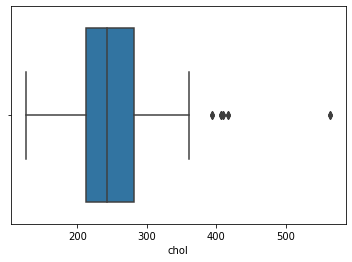

In [5]:
sns.boxplot(df['chol'])

In [6]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)

In [7]:
iqr = Q3-Q1
iqr

68.25

In [8]:
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

<AxesSubplot:xlabel='chol'>

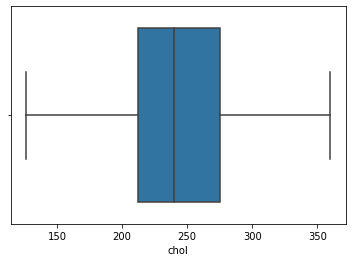

In [9]:
df = df[(df['chol'] < upper_limit) & (df['chol'] > lower_limit)]
sns.boxplot(df['chol'])

<font size="5">Data Transformation</font>

In [10]:
df["thal"].unique()

array([3, 2, 1], dtype=int64)

In [11]:
df["thal"] = df["thal"].replace([2, 3], 0)
df["thal"].unique()

array([0, 1], dtype=int64)

<font size="5">Model Building</font>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df["chol"], df["target"], test_size=0.20)

In [13]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [14]:
reg = LogisticRegression().fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred_from_reg = reg.predict(X_test)
y_pred_from_knn = knn.predict(X_test)
acc_of_reg = accuracy_score(y_test, y_pred_from_reg)
acc_of_knn = accuracy_score(y_test, y_pred_from_knn)
print('Accuracy of Regression:', acc_of_reg*100, '%')
print('Accuracy of KNN :', acc_of_knn*100, '%')

Accuracy of Regression: 56.61764705882353 %
Accuracy of KNN : 80.14705882352942 %
